# Keras test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

inputs = layers.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0],'Test accuracy:', score[1])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2743 - acc: 0.9142 - val_loss: 0.1821 - val_acc: 0.9451
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1031 - acc: 0.9688 - val_loss: 0.0936 - val_acc: 0.9710
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0767 - acc: 0.9766 - val_loss: 0.1131 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0595 - acc: 0.9815 - val_loss: 0.1096 - val_acc: 0.9690
Epoch 5/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0516 - acc: 0.9844 - val_loss: 0.0808 - val_acc: 0.9754
Epoch 6/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0436 - acc: 0.9865 - val_loss: 0.1013 - val_acc: 0.9726
Epoch 7/

In [2]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


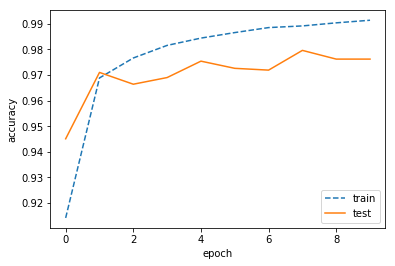

In [3]:
# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()